# 0) Setup

In [1]:
# !pip install yfinance -q
# !pip install pandas -q
# !pip install matplotlib -q
# !pip install scikit-learn -q
# !pip install statsmodels -q
# !pip install tensorflow -q
# !pip install fbprophet -q
# !pip install prophet -q
# !pip install statsmodels -q

In [2]:
# Filtering out Warnings from output
import warnings
warnings.simplefilter("ignore")

# 1) Data Fetching

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf

# Fetch Bitcoin data
btc_data = yf.download('BTC-USD', start='2014-10-01', end='2024-05-31')
btc_data.to_excel("Fetched_BTC_Data_V1.xlsx")
btc_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-01,387.427002,391.378998,380.779999,383.614990,383.614990,26229400
2014-10-02,383.988007,385.497009,372.946014,375.071991,375.071991,21777700
2014-10-03,375.181000,377.695007,357.859009,359.511993,359.511993,30901200
2014-10-04,359.891998,364.487000,325.885986,328.865997,328.865997,47236500
2014-10-05,328.915985,341.800995,289.295990,320.510010,320.510010,83308096


In [4]:
print("Number of Records: ", btc_data.shape[0])
btc_data.info()

Number of Records:  3530
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3530 entries, 2014-10-01 to 2024-05-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3530 non-null   float64
 1   High       3530 non-null   float64
 2   Low        3530 non-null   float64
 3   Close      3530 non-null   float64
 4   Adj Close  3530 non-null   float64
 5   Volume     3530 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 193.0 KB


# 2) Data Exploration

In [5]:
# Summary statistics
summary_stats = btc_data.describe()
print("\nSummary Statistics:")
summary_stats


Summary Statistics:


,Open,High,Low,Close,Adj Close,Volume
count,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3.530000e+03
mean,16492.625734,16875.873639,16084.209126,16510.644143,16510.644143,1.731341e+10
std,18262.535148,18693.149269,17790.663183,18279.073077,18279.073077,1.924282e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,1057.099976,1089.672485,1040.527496,1061.779968,1061.779968,2.532700e+08
50%,8810.702637,8996.875000,8619.237793,8807.636719,8807.636719,1.319026e+10
75%,27266.747070,27790.822754,26836.931641,27292.176758,27292.176758,2.788738e+10
max,73079.375000,73750.070312,71334.093750,73083.500000,73083.500000,3.509679e+11


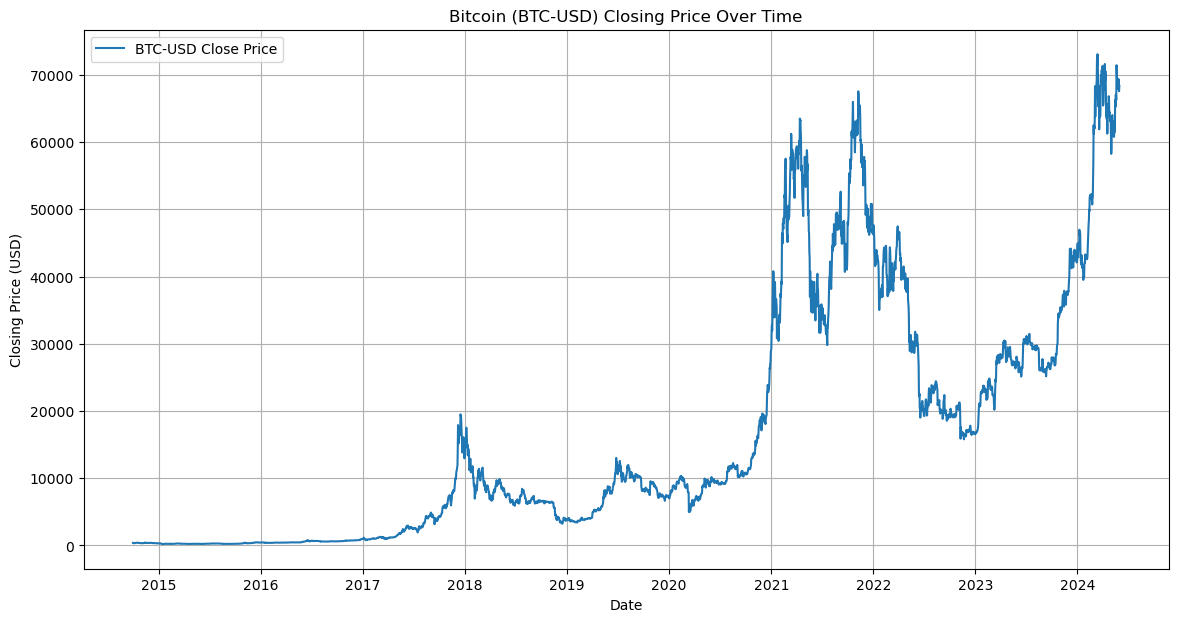

In [6]:
import matplotlib.pyplot as plt

# Plotting the closing price over time
plt.figure(figsize=(14, 7))
plt.plot(btc_data['Close'], label='BTC-USD Close Price')
plt.title('Bitcoin (BTC-USD) Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid()
plt.show()

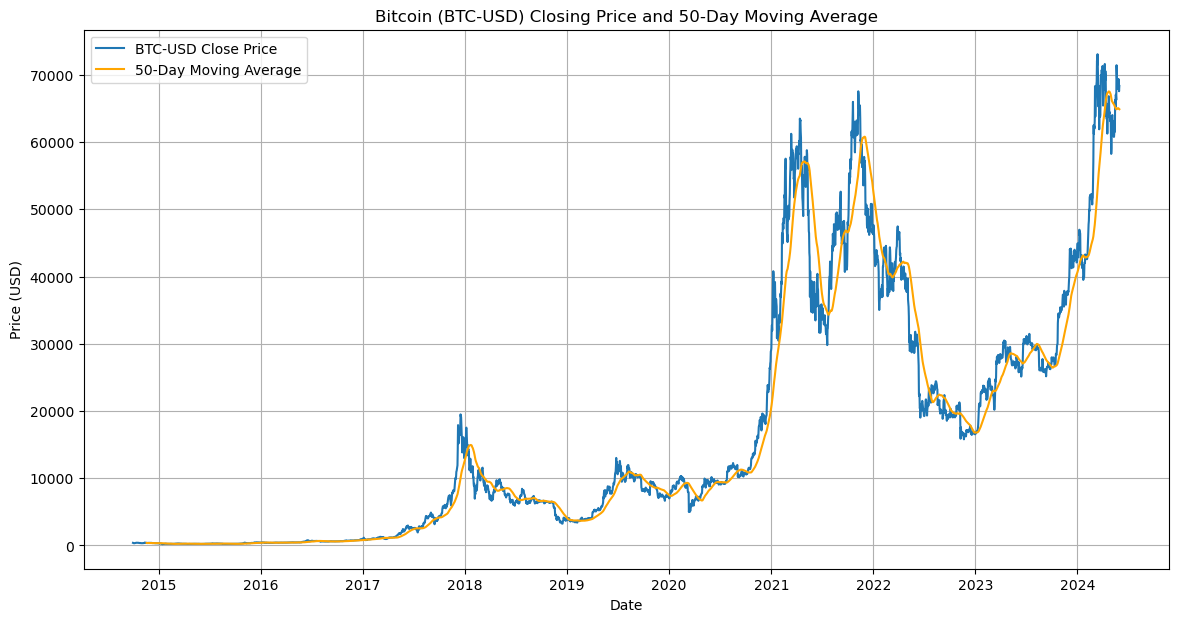

In [7]:
# Calculate and plot the moving average (50-day)
btc_data['50-day MA'] = btc_data['Close'].rolling(window=50).mean()
plt.figure(figsize=(14, 7))
plt.plot(btc_data['Close'], label='BTC-USD Close Price')
plt.plot(btc_data['50-day MA'], label='50-Day Moving Average', color='orange')
plt.title('Bitcoin (BTC-USD) Closing Price and 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

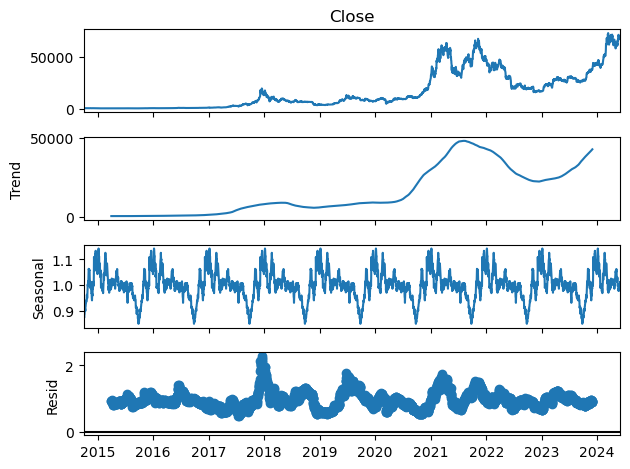

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal Decomposition
result = seasonal_decompose(btc_data['Close'], model='multiplicative', period=365)
result.plot()
plt.show()

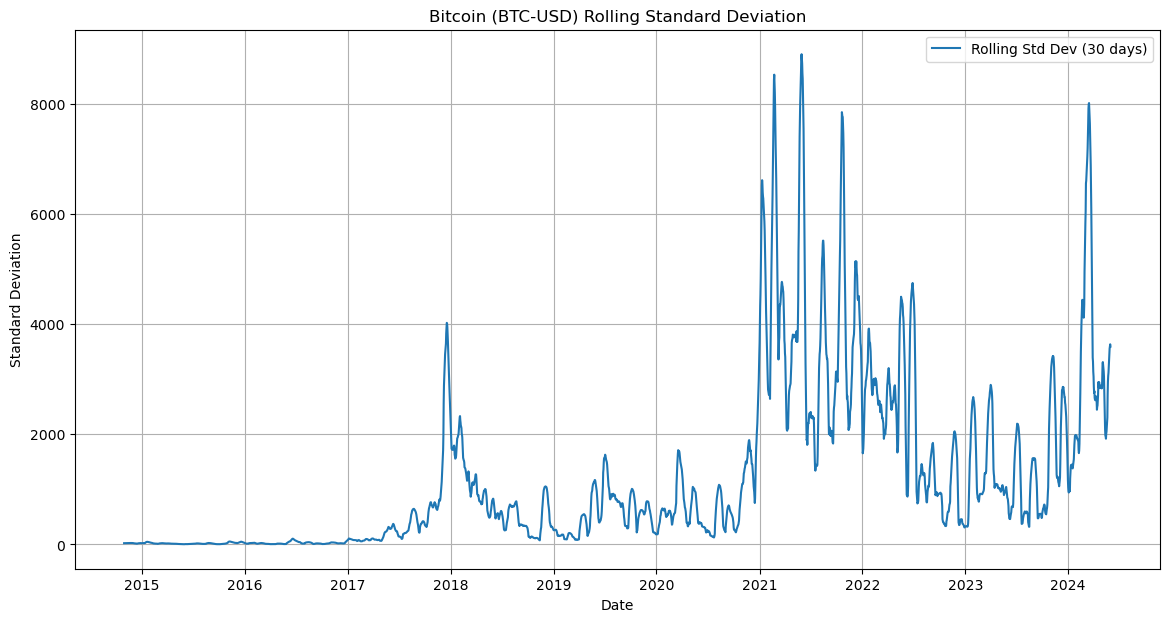

In [9]:
# Calculate rolling standard deviation
btc_data['Rolling Std Dev'] = btc_data['Close'].rolling(window=30).std()

plt.figure(figsize=(14, 7))
plt.plot(btc_data['Rolling Std Dev'], label='Rolling Std Dev (30 days)')
plt.title('Bitcoin (BTC-USD) Rolling Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid()
plt.show()

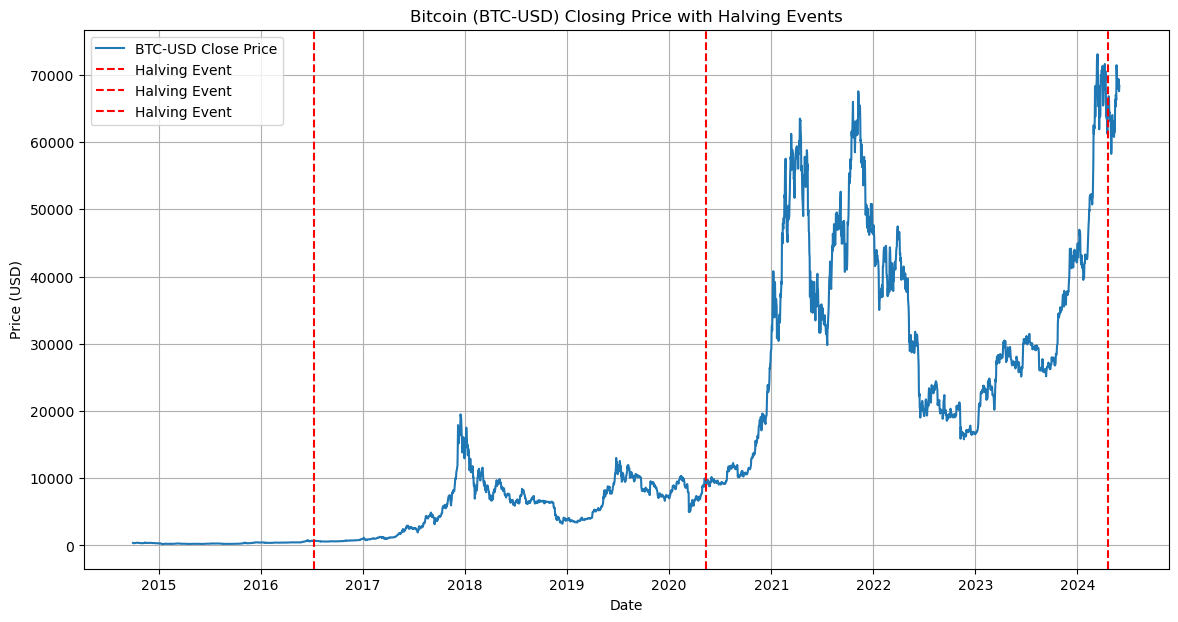

In [10]:
halving_dates = ['2016-07-09', '2020-05-11', '2024-04-19']

plt.figure(figsize=(14, 7))
plt.plot(btc_data['Close'], label='BTC-USD Close Price')
for date in halving_dates:
    plt.axvline(pd.to_datetime(date), color='r', linestyle='--', label='Halving Event')
plt.title('Bitcoin (BTC-USD) Closing Price with Halving Events')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

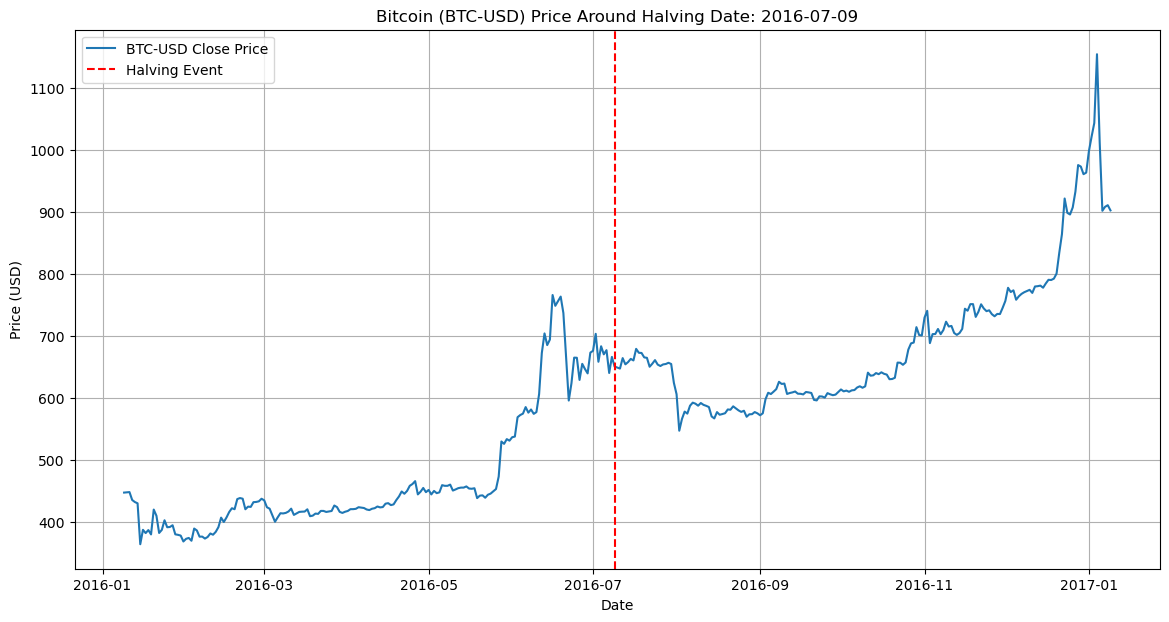

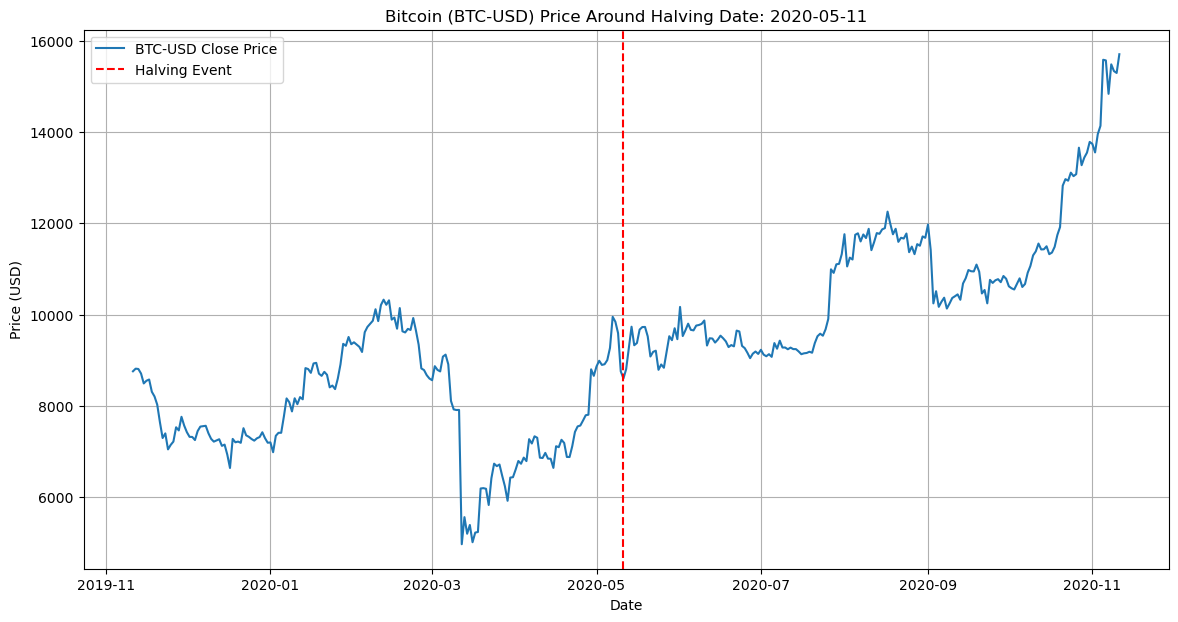

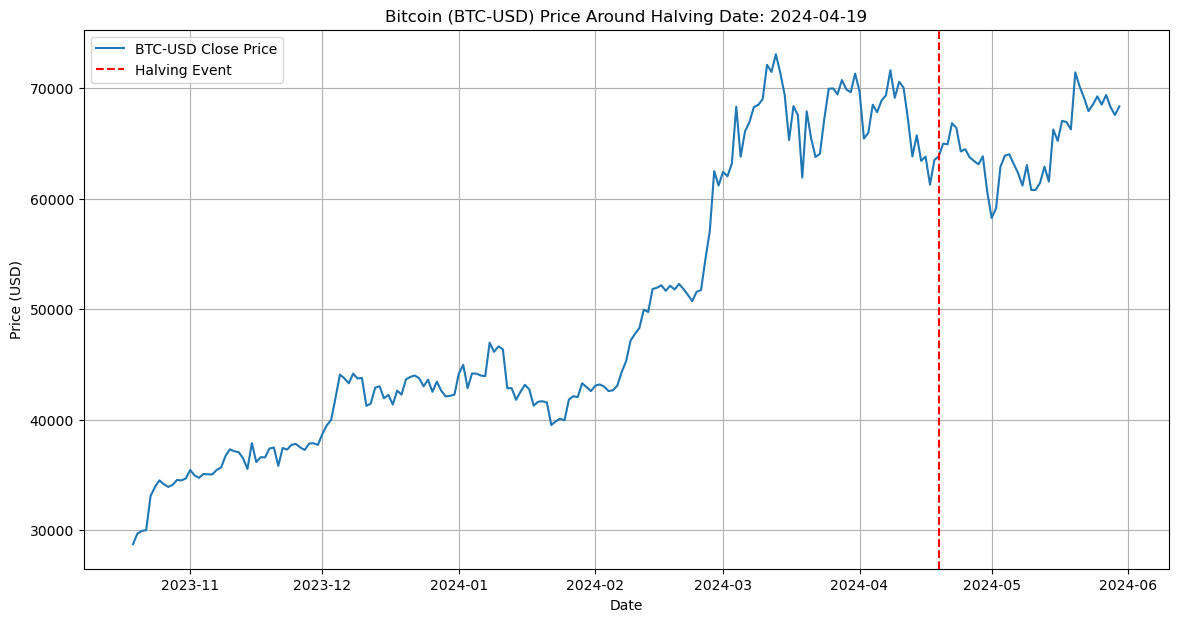

In [11]:
for halving_date in halving_dates:
    halving_date = pd.to_datetime(halving_date)
    start_date = halving_date - pd.DateOffset(months=6)
    end_date = halving_date + pd.DateOffset(months=6)
    halving_period = btc_data.loc[start_date:end_date]
    
    plt.figure(figsize=(14, 7))
    plt.plot(halving_period['Close'], label='BTC-USD Close Price')
    plt.axvline(halving_date, color='r', linestyle='--', label='Halving Event')
    plt.title(f'Bitcoin (BTC-USD) Price Around Halving Date: {halving_date.date()}')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid()
    plt.show()

In [12]:
# Correlation matrix
correlation_matrix = btc_data[['Close', 'Volume']].corr()
correlation_matrix

,Close,Volume
Close,1.000000,0.659977
Volume,0.659977,1.000000


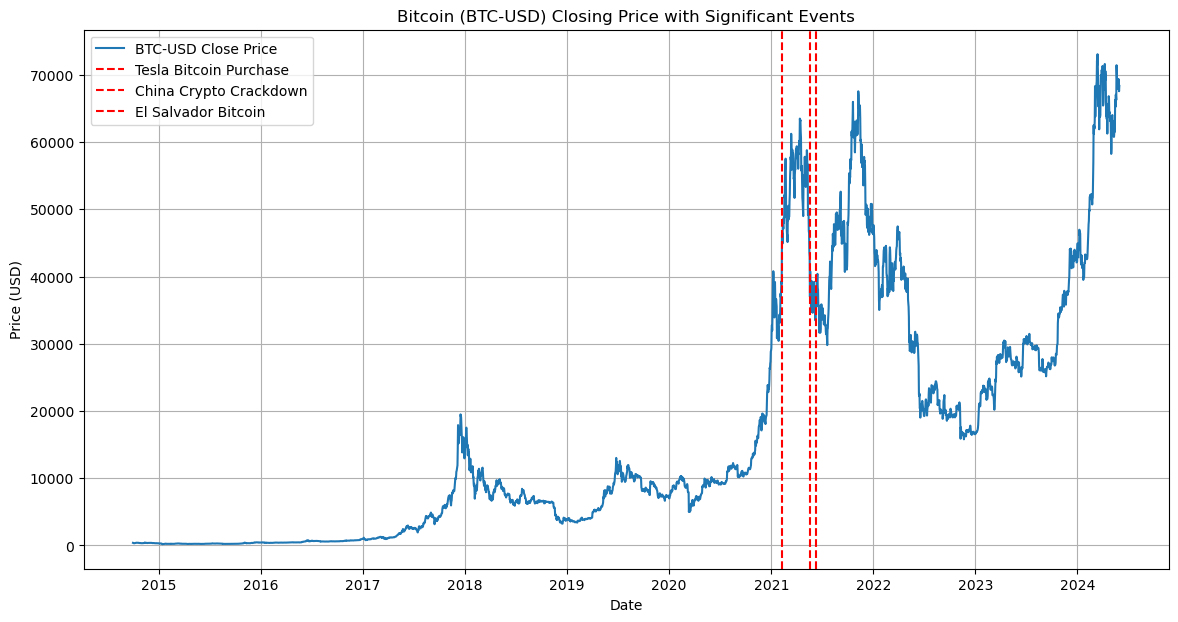

In [13]:
events = {
    'Tesla Bitcoin Purchase': '2021-02-08',
    'China Crypto Crackdown': '2021-05-19',
    'El Salvador Bitcoin': '2021-06-09'
}

# Plot events on the closing price chart
plt.figure(figsize=(14, 7))
plt.plot(btc_data['Close'], label='BTC-USD Close Price')
for event, date in events.items():
    plt.axvline(pd.to_datetime(date), color='r', linestyle='--', label=event)
plt.title('Bitcoin (BTC-USD) Closing Price with Significant Events')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

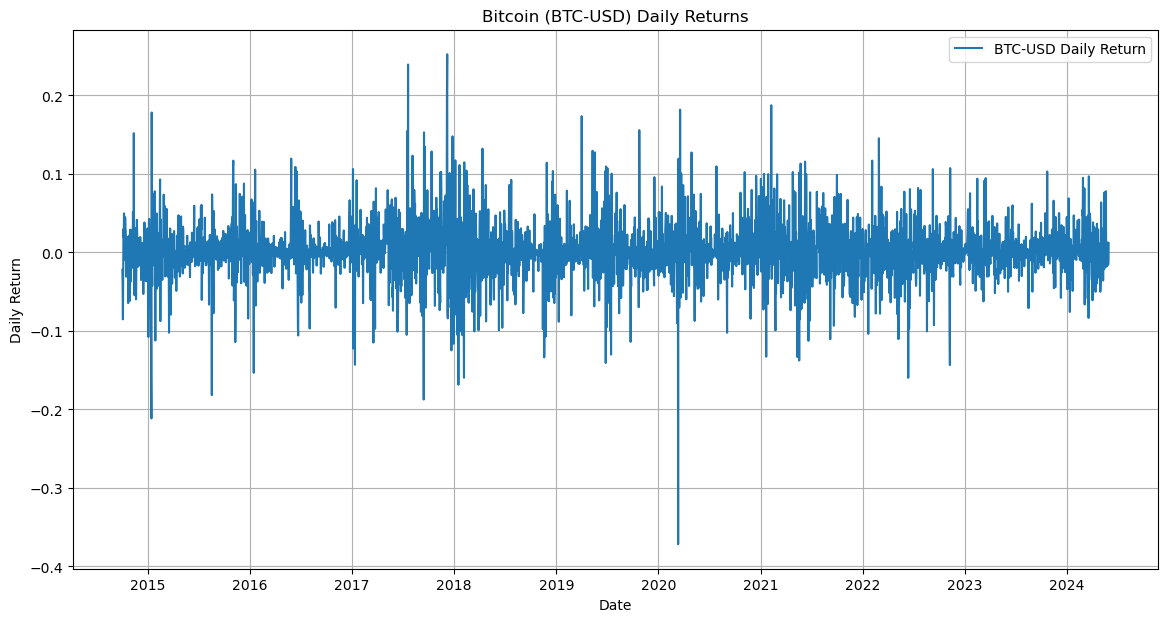

count    3529.000000
mean        0.002149
std         0.036703
min        -0.371695
25%        -0.012413
50%         0.001453
75%         0.017195
max         0.252472
Name: Daily Return, dtype: float64


In [14]:
btc_data['Daily Return'] = btc_data['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(14, 7))
plt.plot(btc_data['Daily Return'], label='BTC-USD Daily Return')
plt.title('Bitcoin (BTC-USD) Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid()
plt.show()

# Summary statistics
print(btc_data['Daily Return'].describe())